# MALIGNANT COMMENTS CLASSIFICATION

Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness, and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behavior.   

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred, and suicidal thoughts.    

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can be used to classify hate and offensive comments so that they can be controlled and restricted from spreading hatred and cyberbullying. 

Data Set Description

The data set contains the training set, which has approximately 1,59,000 samples, and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which include ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   

The data set includes:

Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 

Highly Malignant: It denotes comments that are highly malignant and hurtful. 

Rude: It denotes comments that are very rude and offensive.

Threat: It contains an indication of the comments that are giving any threat to someone. 	

Abuse: It is for comments that are abusive in nature. 

Loathe: It describes the comments which are hateful and loathing in nature.  

ID: It includes unique Ids associated with each comment text given.   

Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering, and classification that can be done on this data. Since the data 
set is huge and includes many categories of comments, we can do a good amount of data exploration and derive some interesting 
features using the comments text column available. 

You need to build a model that can differentiate between comments and their categories.  
Refer to the data set file provided along with this. 


In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', '.*do not.*', )

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

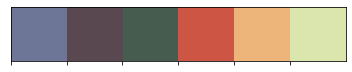

In [3]:
# Color Palettes
colors = ["#6D7696", "#59484F", "#455C4F", "#CC5543", "#EDB579", "#DBE6AF"]
sns.palplot(sns.color_palette(colors))

In [4]:
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax


# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")

In [5]:
train=pd.read_csv('newp.csv')
train.shape

(159571, 8)

In [6]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
test=pd.read_csv('test.csv')
test.shape

(153164, 2)

In [8]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [9]:
print('train shape is ',train.shape)
print('test shape is ',test.shape)
print('test info',test.info)


print('train info',train.info)

train shape is  (159571, 8)
test shape is  (153164, 2)
test info <bound method DataFrame.info of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is no

In [10]:
print('train data Set descriptin',train.describe())
print('test data Set descriptin',test.describe())

train data Set descriptin            malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000 

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


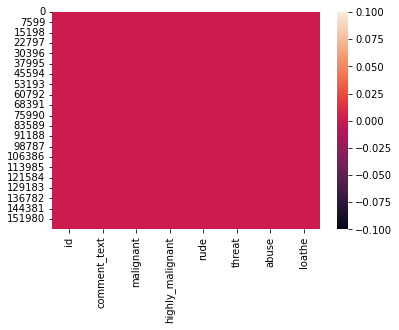

In [11]:
# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


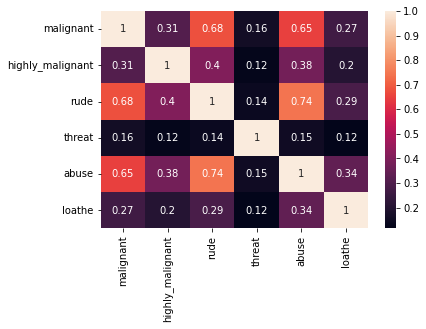

In [18]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr(),annot=True))

In [12]:
# checking the skewness for the features:
train.skew()

malignant            2.745854
highly_malignant     9.851722
rude                 3.992817
threat              18.189001
abuse                4.160540
loathe              10.515923
dtype: float64

malignant


0    144277
1     15294
Name: malignant, dtype: int64


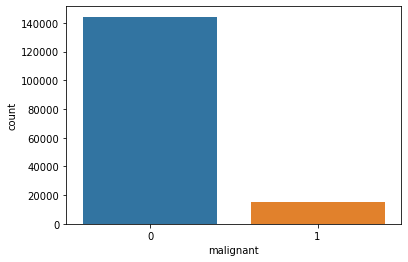

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


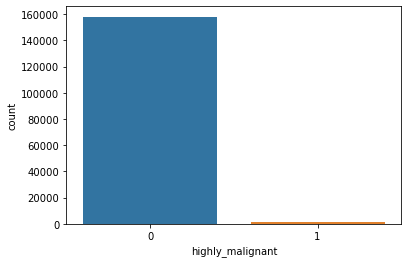

loathe


0    158166
1      1405
Name: loathe, dtype: int64


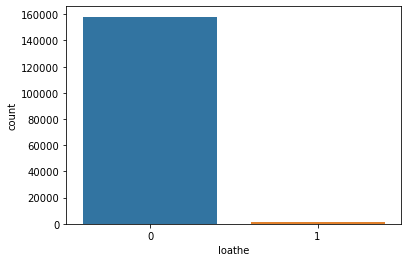

rude


0    151122
1      8449
Name: rude, dtype: int64


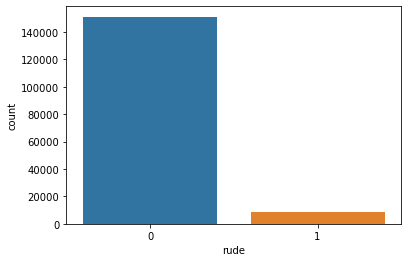

abuse


0    151694
1      7877
Name: abuse, dtype: int64


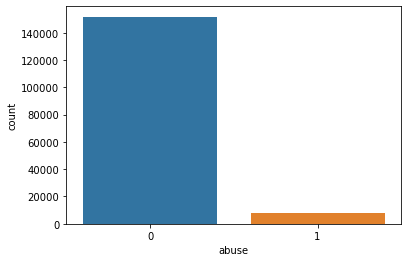

threat


0    159093
1       478
Name: threat, dtype: int64


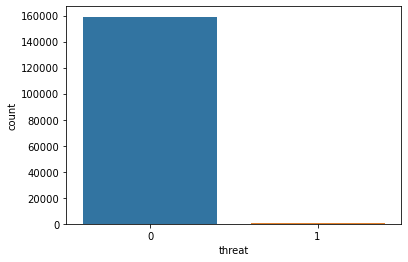

In [10]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

In [11]:
import nltk
#nltk.download('stopwords')

In [12]:
#nltk.download('wordnet')

In [13]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [14]:
train['length'] = train['comment_text'].str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [15]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
train['comment_text'] = train['comment_text'].str.replace(r'\d+(\.\d+)?', 'numbr')


train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [16]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,180
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,111
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,622,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [17]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 62893130
Clean Length 43575187


In [18]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = train['comment_text'][train['malignant']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

Wordcloud does not support python 3.7 or higher till date.

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score,GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

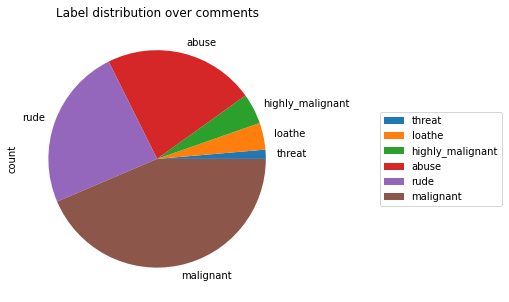

In [20]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y='count',
                                      title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [21]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


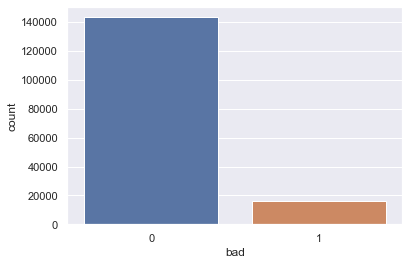

In [22]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [23]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
x = tf_vec.fit_transform(train['comment_text'])


In [24]:
x

<159571x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 3366447 stored elements in Compressed Sparse Row format>

In [25]:
train.shape

(159571, 11)

In [26]:
test.shape

(153164, 2)

In [27]:
y=train['bad']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [29]:
y_train.shape,y_test.shape

((111699,), (47872,))

In [30]:
x_train.shape,x_test.shape

((111699, 10000), (47872, 10000))

# Since the column has binary variable we will use  classification model

# LogisticRegression

In [31]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)*100))
y_pred_lg = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_lg)*100))


Training accuracy is 95.95520103134317
Test accuracy is 95.52974598930481


In [32]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_lg))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_lg))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_lg)))

Error:
Mean Absolute Error: 0.04470254010695187
Mean Squared Error: 0.04470254010695187
Root Mean Square Error: 0.2114297521801316


In [33]:
print(confusion_matrix(y_test,y_pred_lg))
print(classification_report(y_test,y_pred_lg))
print(accuracy_score(y_test,y_pred_lg))

[[42729   221]
 [ 1919  3003]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

    accuracy                           0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872

0.9552974598930482


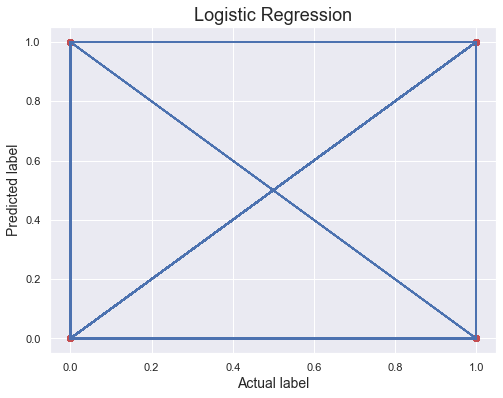

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_lg, color='r')
plt.plot(y_test,y_pred_lg, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('Logistic Regression',fontsize=18)
plt.show()


# DecisionTreeClassifier

In [38]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_dt = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_dt)))


Training accuracy is 0.998817133546406
Test accuracy is 0.9401848660504465


In [39]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

[[27719   897]
 [ 1012  2287]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     28616
           1       0.72      0.69      0.71      3299

    accuracy                           0.94     31915
   macro avg       0.84      0.83      0.84     31915
weighted avg       0.94      0.94      0.94     31915

0.9401848660504465


In [40]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_dt))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_dt))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_dt)))

Error:
Mean Absolute Error: 0.059815133949553505
Mean Squared Error: 0.059815133949553505
Root Mean Square Error: 0.2445713269162056


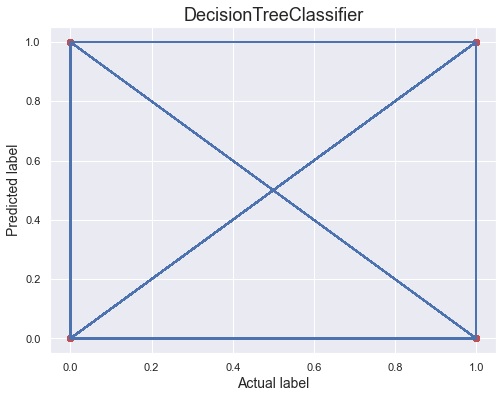

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_dt, color='r')
plt.plot(y_test,y_pred_dt, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('DecisionTreeClassifier',fontsize=18)
plt.show()

# RandomForestClassifier

In [42]:

RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_rfc = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_rfc)))


Training accuracy is 0.9988092999937331
Test accuracy is 0.9548801503994987


In [43]:
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print(accuracy_score(y_test,y_pred_rfc))

[[28239   377]
 [ 1063  2236]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28616
           1       0.86      0.68      0.76      3299

    accuracy                           0.95     31915
   macro avg       0.91      0.83      0.87     31915
weighted avg       0.95      0.95      0.95     31915

0.9548801503994987


In [44]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_rfc))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_rfc))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_rfc)))

Error:
Mean Absolute Error: 0.04511984960050133
Mean Squared Error: 0.04511984960050133
Root Mean Square Error: 0.21241433473403185


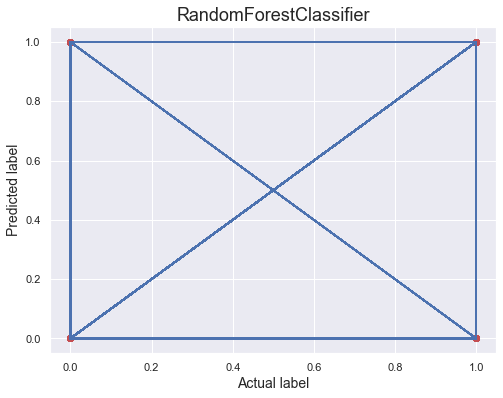

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_rfc, color='r')
plt.plot(y_test,y_pred_rfc, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('RandomForestClassifier',fontsize=18)
plt.show()

# xgboost

In [47]:
import xgboost
xgb = xgboost.XGBClassifier(eval_metric='mlogloss')
xgb.fit(x_train, y_train)
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_xgb = xgb.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_xgb)))


Training accuracy is 0.9614040859810742
Test accuracy is 0.9524361585461382


In [48]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_xgb))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_xgb))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_xgb)))

Error:
Mean Absolute Error: 0.04756384145386182
Mean Squared Error: 0.04756384145386182
Root Mean Square Error: 0.21809136033750126


In [49]:
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))
print(accuracy_score(y_test,y_pred_xgb))

[[28431   185]
 [ 1333  1966]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     28616
           1       0.91      0.60      0.72      3299

    accuracy                           0.95     31915
   macro avg       0.93      0.79      0.85     31915
weighted avg       0.95      0.95      0.95     31915

0.9524361585461382


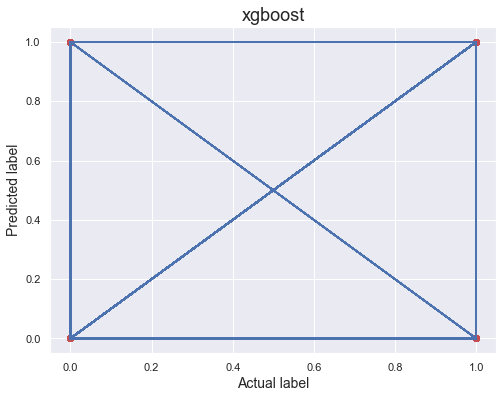

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_xgb, color='r')
plt.plot(y_test,y_pred_xgb, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('xgboost',fontsize=18)
plt.show()

# AdaBoostClassifier

In [153]:

ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_ada = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_ada)))


Training accuracy is 0.9512361346117691
Test accuracy is 0.949114836283879


In [154]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_ada))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_ada)))

Error:
Mean Absolute Error: 0.050885163716120944
Mean Squared Error: 0.050885163716120944
Root Mean Square Error: 0.22557740072117363


In [155]:
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada))
print(accuracy_score(y_test,y_pred_ada))

[[28344   272]
 [ 1352  1947]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28616
           1       0.88      0.59      0.71      3299

    accuracy                           0.95     31915
   macro avg       0.92      0.79      0.84     31915
weighted avg       0.95      0.95      0.94     31915

0.949114836283879


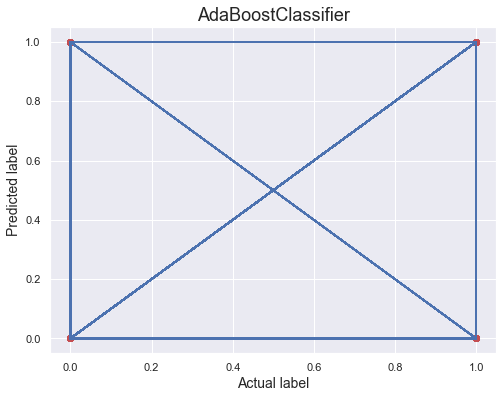

In [156]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_ada, color='r')
plt.plot(y_test,y_pred_ada, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('AdaBoostClassifier',fontsize=18)
plt.show()

# KNeighborsClassifier

In [157]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_knn = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_knn)))

Training accuracy is 0.9231841824904431
Test accuracy is 0.917781607394642


In [158]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred_knn))
print('Mean Squared Error:',mean_squared_error(y_test,y_pred_knn))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test,y_pred_knn)))

Error:
Mean Absolute Error: 0.08221839260535799
Mean Squared Error: 0.08221839260535799
Root Mean Square Error: 0.2867374977315628


In [159]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))

[[28516   100]
 [ 2524   775]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28616
           1       0.89      0.23      0.37      3299

    accuracy                           0.92     31915
   macro avg       0.90      0.62      0.66     31915
weighted avg       0.92      0.92      0.90     31915

0.917781607394642


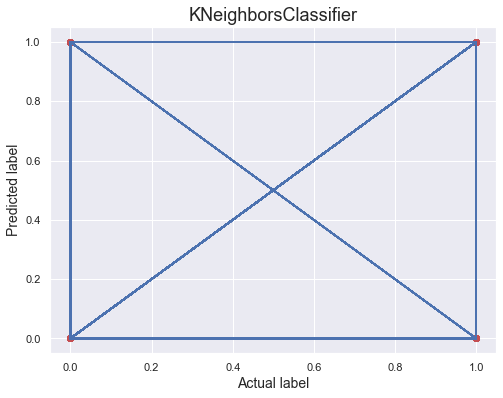

In [160]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=y_pred_knn, color='r')
plt.plot(y_test,y_pred_knn, color='b')
plt.xlabel('Actual label',fontsize=14)
plt.ylabel('Predicted label',fontsize=14)
plt.title('KNeighborsClassifier',fontsize=18)
plt.show()

# List of accuracy score of different classification models

In [161]:
print("logistic Regression:-",accuracy_score(y_test,y_pred_lg))
print("Dicision Tree Classifier:-",accuracy_score(y_test,y_pred_dt))
print("Random Forest classifier:-",accuracy_score(y_test,y_pred_rf))
print("xgboost:-",accuracy_score(y_test,y_pred_xgb))
print("AdaBoostClassifier:-",accuracy_score(y_test,y_pred_ada))
print("KNeighborsClassifier:-",accuracy_score(y_test,y_pred_knn))

logistic Regression:- 0.9557888140372865
Dicision Tree Classifier:- 0.9382422058593138
Random Forest classifier:- 0.9555694814350619
xgboost:- 0.9528434905216983
AdaBoostClassifier:- 0.949114836283879
KNeighborsClassifier:- 0.917781607394642


# Plotting Auc-Roc curve..with logistic regression prediction..

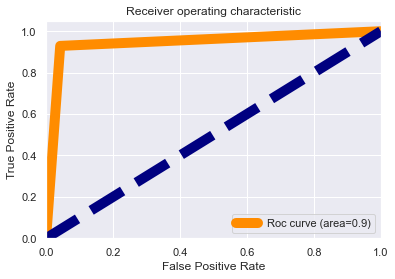

In [170]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
from sklearn.metrics import roc_curve,auc
    
fpr,tpr,threshold=roc_curve(y_pred_lg,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='Roc curve (area=%0.1f)'% roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Conclusion:

In [53]:
import numpy as np
a=np.array(y_test)
a

array([0, 1, 0, ..., 0, 1, 0])

In [54]:
y_test.shape

(31915,)

In [55]:
predicted=np.array(y_pred_lg)
predicted

array([0, 1, 0, ..., 0, 1, 0])

In [56]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
print(df_com)
print(" 0 denotes a NO while 1 denotes a YES")

       original  predicted
0             0          0
1             1          1
2             0          0
3             1          1
4             0          0
...         ...        ...
31910         0          0
31911         0          0
31912         0          0
31913         1          1
31914         0          0

[31915 rows x 2 columns]
 0 denotes a NO while 1 denotes a YES


In [57]:
df_com.sample(10)

,original,predicted
30043,0,0
15424,0,0
5672,0,0
8618,0,0
27082,0,0
29750,1,0
12522,0,0
26153,0,0
11126,0,0
10528,0,0


# The best model is Logistic Regression as Accuracy score is best from above tested models.

In [58]:
print("Accuracy Score:-",(accuracy_score(y_test,y_pred_lg)*100))

Accuracy Score:- 95.58828137239543


# Our Model performs with Accuracy Score 95.588%...

# Saving the best models with initials...using pickle library

In [59]:
import pickle
filename = 'Malignant_Project'
pickle.dump(LG, open(filename, 'wb'))

In [87]:
import eli5
eli5.show_weights(RF,vec = tf_vec, top = 30)
#random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0733 ± 0.0598,fuck
0.0395 ± 0.0449,fucking
0.0284 ± 0.0273,shit
0.0200 ± 0.0113,idiot
0.0197 ± 0.0153,stupid
0.0197 ± 0.0166,suck
0.0174 ± 0.0204,bitch
0.0169 ± 0.0152,asshole
0.0117 ± 0.0108,dick
0.0112 ± 0.0105,faggot


In [34]:
test_data =tf_vec.fit_transform(test['comment_text'])
print(test_data)

  (0, 8900)	0.08853748869422334
  (0, 7575)	0.10112270687721589
  (0, 8846)	0.11018417609155799
  (0, 1319)	0.16975668731840382
  (0, 3734)	0.16551202500755058
  (0, 1380)	0.16870783819907076
  (0, 9086)	0.23046059268638447
  (0, 5190)	0.07387699141891217
  (0, 9737)	0.11230715476716062
  (0, 7984)	0.11458177587215672
  (0, 2863)	0.13206684145824196
  (0, 5402)	0.12139956384327034
  (0, 5835)	0.14232841382146805
  (0, 2402)	0.15789862407661107
  (0, 6841)	0.19405330296334708
  (0, 4033)	0.1405658850559772
  (0, 826)	0.12369093740824466
  (0, 4979)	0.1824957777030722
  (0, 3373)	0.19863272050590527
  (0, 9594)	0.27137994467681653
  (0, 9272)	0.1576824098371852
  (0, 8117)	0.20170860888908118
  (0, 7703)	0.16216939068005085
  (0, 4123)	0.2011675623242019
  (0, 9586)	0.18507180469446205
  :	:
  (153162, 563)	0.11415765362660668
  (153162, 8976)	0.1568193529222448
  (153162, 5715)	0.11316538172707276
  (153162, 5203)	0.09962307616562628
  (153162, 5881)	0.13172035155304831
  (153162, 4763)

In [35]:
test_data.shape

(153164, 10000)

In [36]:
import numpy as np
a=np.array(test_data)
a

array(<153164x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2940344 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [37]:
prediction=LG.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
df_com=pd.DataFrame({"Id":test['id'],"original":test['comment_text'],"tf_vef":test_data,"predicted":prediction}, index= range(len(test['comment_text'])))
df_com

,Id,original,tf_vef,predicted
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,"(0, 8900)\t0.08853748869422334\n (0, 7575)\...",0
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,"(0, 4445)\t0.5903559480078723\n (0, 3544)\t...",0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...","(0, 811)\t0.9261678546313611\n (0, 8237)\t0...",0
3,00017563c3f7919a,":If you have a look back at the source, the in...","(0, 5580)\t0.21021069943937637\n (0, 8814)\...",0
4,00017695ad8997eb,I don't anonymously edit articles at all.,"(0, 794)\t0.34482055286747326\n (0, 3005)\t...",0
...,...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...","(0, 8473)\t0.45413777825397894\n (0, 492)\t...",0
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,"(0, 7562)\t0.2903148076761856\n (0, 3509)\t...",0
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...","(0, 8785)\t0.28402001465975135\n (0, 3936)\...",0
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...","(0, 453)\t0.16057785458139917\n (0, 5410)\t...",0


In [40]:
df_com.to_csv('test_data_prediction.csv')

In [94]:
df_com.sample(25)

,original,predicted
41212,Mahomed paruk \n\n Obsessive compulsive Disord...,0
122395,== Sockpuppet == \n\n Looking at your reformed...,0
110969,", 18 August 2005 (UTC) \n :It is when it is ha...",0
135487,"::: I've been called an Islamo-fascist bitch, ...",0
125129,""" \n Hello Jim. If the merge goes through, wha...",0
64056,Using your finger or a paper towel to rub in t...,0
140731,""" \n\n == So-called """"Easter Eggs"""" == \n\n Th...",0
79140,"""::I'm well aware of the mechanics of the Assi...",0
56969,""" remove this notice] at any time by removing ...",0
98084,""" \n\n :""""Long fhada"""" as used in the article ...",0
